In [57]:
from couch import *
all_docs('JpgImg')[:4]


[<Document 'b752589be29b9375958a93aefe000e1f'@'1-e5a5b0f0af5f9b7be7489f27ddaa8c45' {'type': 'JpgImg', 'name': '000000366884.jpg', 'quantization': ['0302020302020303030304030304050805050404050a070706080c0a0c0c0b0a0b0b0d0e12100d0e110e0b0b1016101113141515150c0f171816141812141514', '03040405040509050509140d0b0d1414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414'], 'quality': 90, 'dataset': 'val2017'}>,
 <Document 'b752589be29b9375958a93aefe00196e'@'1-8527ac39ef9fc24efb51c6cb44681735' {'type': 'JpgImg', 'name': '000000367082.jpg', 'quantization': ['01010101010101010101010101020203020202020204030302030504050505040404050607060505070604040609060708080808080506090a09080a07080808', '01010102020204020204080504050808080808080808080808080808080808080808080808080808080808080808080808080808080808080808080808080808'], 'quality': 96, 'dataset': 'val2017'}>,
 <Document 'b752589be29b9375958a93aefe001a18'@'1-9c297e686af30e2d7fbc05f3bf261053' {'type': 'JpgIm

In [3]:
all_docs('JpgMod')[:3]

[<Document '40331ef1e1a7d75c9c3793602b0028a7'@'1-40d7443873a92f92fa52dc8543d46468' {'type': 'JpgMod', 'name': '001_000000000139.jpg', 'quantization': ['ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff', 'ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff'], 'quality': 1, 'dataset': 'fake'}>,
 <Document '40331ef1e1a7d75c9c3793602b00348c'@'1-0bf80c708704a40ddb0b4921748a6c5b' {'type': 'JpgMod', 'name': '001_000000000285.jpg', 'quantization': ['ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff', 'ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff'], 'quality': 1, 'dataset': 'fake'}>,
 <Document '40331ef1e1a7d75c9c3793602b00417c'@'1-b6f2f9ee60adcf2a15f47a8394cfd2c1' {'type': 'JpgMo

In [58]:
from collections import defaultdict

In [59]:
def stat_type(type_):
    stat = defaultdict(set)
    for doc in all_docs(type_):
        if len(doc['quantization']) == 1:
            stat[doc['quantization'][0]].add((doc['quality'], 'QT'))
        else:
            stat[doc['quantization'][0]].add((doc['quality'], 'QT1'))
            stat[doc['quantization'][1]].add((doc['quality'], 'QT2'))
    return stat

In [60]:
# pd.DataFrame(all_docs('JpgImg'))

In [33]:
orig = stat_type('JpgImg')

In [21]:
fake = stat_type('JpgMod')

In [34]:
orig

defaultdict(set,
            {'0302020302020303030304030304050805050404050a070706080c0a0c0c0b0a0b0b0d0e12100d0e110e0b0b1016101113141515150c0f171816141812141514': {(90,
               'QT1')},
             '03040405040509050509140d0b0d1414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414': {(90,
               'QT2')},
             '01010101010101010101010101020203020202020204030302030504050505040404050607060505070604040609060708080808080506090a09080a07080808': {(96,
               'QT'),
              (96, 'QT1')},
             '01010102020204020204080504050808080808080808080808080808080808080808080808080808080808080808080808080808080808080808080808080808': {(96,
               'QT2')},
             '06040506050406060506070706080a100a0a09090a140e0f0c1017141818171416161a1d251f1a1b231c1616202c20232627292a29191f2d302d283025282928': {(80,
               'QT1')},
             '0707070a080a130a0a13281a161a2828282828282828282828282828282828282828

In [23]:
len(orig.keys())

6

In [24]:
len(fake.keys())

196

In [25]:
len([(k, v) for k, v in fake.items() if len(v) > 1])

2

In [27]:
[(k, v) for k, v in fake.items() if len(v) > 1]

[('ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff',
  {(1, 'QT1'), (1, 'QT2'), (2, 'QT2'), (3, 'QT2')}),
 ('01010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101',
  {(100, 'QT1'), (100, 'QT2')})]

In [28]:
for qt in orig.keys():
    print(qt, fake[qt])

0302020302020303030304030304050805050404050a070706080c0a0c0c0b0a0b0b0d0e12100d0e110e0b0b1016101113141515150c0f171816141812141514 {(90, 'QT1')}
03040405040509050509140d0b0d1414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414 {(90, 'QT2')}
01010101010101010101010101020203020202020204030302030504050505040404050607060505070604040609060708080808080506090a09080a07080808 {(96, 'QT1')}
01010102020204020204080504050808080808080808080808080808080808080808080808080808080808080808080808080808080808080808080808080808 {(96, 'QT2')}
06040506050406060506070706080a100a0a09090a140e0f0c1017141818171416161a1d251f1a1b231c1616202c20232627292a29191f2d302d283025282928 {(80, 'QT1')}
0707070a080a130a0a13281a161a2828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828 {(80, 'QT2')}


In [29]:
from collections import Counter
Counter(d['quality'] for d in all_docs('JpgImg'))

Counter({90: 1414, 96: 3540, 80: 46})

In [30]:
Counter(len(d['quantization']) for d in all_docs('JpgImg'))

Counter({2: 4990, 1: 10})

In [35]:
Counter(len(d['quantization']) for d in all_docs('JpgMod75'))

Counter({2: 4866, 1: 134})

In [61]:
from imports import *
import pandas as pd

In [62]:
meta = MetadataCatalog.get('coco_2017_val')
dset = DatasetCatalog.get('coco_2017_val')

In [63]:
# meta.thing_classes

def get_dicts():
    for img in dset:
        for obj in img['annotations']:
            d = obj.copy()
            del d['segmentation']
            del d['bbox_mode']
            d['filename'] = img['file_name']
            yield d


In [64]:
df = pd.DataFrame(get_dicts())

In [65]:
df['category'] = df['category_id'].map(lambda x: meta.thing_classes[x])

In [6]:
df

,iscrowd,bbox,category_id,filename,category
0,0,"[236.98, 142.51, 24.7, 69.5]",58,datasets/coco/val2017/000000000139.jpg,potted plant
1,0,"[7.03, 167.76, 149.32, 94.87]",62,datasets/coco/val2017/000000000139.jpg,tv
2,0,"[557.21, 209.19, 81.35, 78.73]",62,datasets/coco/val2017/000000000139.jpg,tv
3,0,"[358.98, 218.05, 56.0, 102.83]",56,datasets/coco/val2017/000000000139.jpg,chair
4,0,"[290.69, 218.0, 61.83, 98.48]",56,datasets/coco/val2017/000000000139.jpg,chair
...,...,...,...,...,...
36776,0,"[582.44, 141.91, 57.56, 86.75]",46,datasets/coco/val2017/000000581781.jpg,banana
36777,0,"[75.43, 105.54, 98.19, 107.17]",46,datasets/coco/val2017/000000581781.jpg,banana
36778,0,"[2.15, 2.15, 41.89, 170.79]",46,datasets/coco/val2017/000000581781.jpg,banana
36779,0,"[193.18, 183.42, 248.91, 63.15]",46,datasets/coco/val2017/000000581781.jpg,banana


In [7]:
df.category.value_counts()

person        11004
car            1932
chair          1791
book           1161
bottle         1025
              ...  
toothbrush       57
microwave        55
scissors         36
hair drier       11
toaster           9
Name: category, Length: 80, dtype: int64

In [8]:
df[df.iscrowd == 0]

,iscrowd,bbox,category_id,filename,category
0,0,"[236.98, 142.51, 24.7, 69.5]",58,datasets/coco/val2017/000000000139.jpg,potted plant
1,0,"[7.03, 167.76, 149.32, 94.87]",62,datasets/coco/val2017/000000000139.jpg,tv
2,0,"[557.21, 209.19, 81.35, 78.73]",62,datasets/coco/val2017/000000000139.jpg,tv
3,0,"[358.98, 218.05, 56.0, 102.83]",56,datasets/coco/val2017/000000000139.jpg,chair
4,0,"[290.69, 218.0, 61.83, 98.48]",56,datasets/coco/val2017/000000000139.jpg,chair
...,...,...,...,...,...
36775,0,"[439.33, 94.35, 160.05, 171.86]",46,datasets/coco/val2017/000000581781.jpg,banana
36776,0,"[582.44, 141.91, 57.56, 86.75]",46,datasets/coco/val2017/000000581781.jpg,banana
36777,0,"[75.43, 105.54, 98.19, 107.17]",46,datasets/coco/val2017/000000581781.jpg,banana
36778,0,"[2.15, 2.15, 41.89, 170.79]",46,datasets/coco/val2017/000000581781.jpg,banana


In [9]:
df[df.iscrowd == 1]

,iscrowd,bbox,category_id,filename,category
38,1,"[416, 43, 153, 303]",73,datasets/coco/val2017/000000000632.jpg,book
204,1,"[0, 18, 499, 263]",0,datasets/coco/val2017/000000002299.jpg,person
352,1,"[523, 26, 116, 288]",0,datasets/coco/val2017/000000005001.jpg,person
393,1,"[0, 0, 319, 239]",0,datasets/coco/val2017/000000005586.jpg,person
514,1,"[337, 272, 267, 28]",0,datasets/coco/val2017/000000007511.jpg,person
...,...,...,...,...,...
36286,1,"[7, 131, 611, 224]",0,datasets/coco/val2017/000000572620.jpg,person
36374,1,"[130, 346, 184, 38]",7,datasets/coco/val2017/000000573943.jpg,truck
36622,1,"[10, 10, 552, 416]",41,datasets/coco/val2017/000000579070.jpg,cup
36678,1,"[47, 148, 244, 250]",50,datasets/coco/val2017/000000579900.jpg,broccoli


In [70]:
from IPython.display import Image, display

In [ ]:
for (idx, (f, cat)) in df[df.iscrowd == 1][['filename', 'category']].iterrows():
    #print(f, cat)
    display(Image(f))
    display(cat)
    break

In [13]:
df[df.iscrowd == 1].category.value_counts()

person           227
book              32
chair             20
car               14
bird              13
bottle            12
donut             10
kite               9
banana             9
cow                8
sheep              7
umbrella           6
boat               6
cake               6
carrot             6
suitcase           4
motorcycle         4
broccoli           4
cup                4
vase               3
bowl               3
sports ball        3
traffic light      3
elephant           3
apple              3
zebra              2
orange             2
hot dog            2
tie                2
bench              2
bicycle            2
dining table       2
bus                2
surfboard          2
wine glass         2
truck              1
horse              1
potted plant       1
knife              1
baseball bat       1
pizza              1
teddy bear         1
Name: category, dtype: int64

In [14]:
df[df.iscrowd == 1].category.value_counts().shape

(42,)

In [36]:
all_docs('Result')[:10]

[<Document '63eec5765a48a594b94208499800fd04'@'1-d11c682377b5fc569fd52b4ab54e866d' {'quality': 64, 'bbox': {'AP': 35.92233851025809, 'AP50': 53.624655648435436, 'AP75': 39.259538097791506, 'APs': 17.59158172921125, 'APm': 39.79811732337794, 'APl': 50.981600334950926, 'AP-person': 50.59302339805936, 'AP-bicycle': 29.708733702344393, 'AP-car': 38.051859475577324, 'AP-motorcycle': 40.76503303047582, 'AP-airplane': 62.216422523055, 'AP-bus': 62.117838550873635, 'AP-train': 57.04543942172483, 'AP-truck': 27.75413281275138, 'AP-boat': 23.692857766072077, 'AP-traffic light': 21.597506081846056, 'AP-fire hydrant': 62.26338379813855, 'AP-stop sign': 61.21653315569304, 'AP-parking meter': 41.83164970754759, 'AP-bench': 20.926286401475217, 'AP-bird': 30.78653755649359, 'AP-cat': 61.66208253634717, 'AP-dog': 56.13972906986425, 'AP-horse': 52.7405369278079, 'AP-sheep': 43.48235087348109, 'AP-cow': 48.64997803757588, 'AP-elephant': 58.43295716310156, 'AP-bear': 61.96502107314239, 'AP-zebra': 62.1948

In [37]:
r1 = all_docs('Result')[0]

In [39]:
r1['bbox']['AP']

35.92233851025809

In [43]:
import numpy as np

In [47]:
np.array([v for k, v in r1['bbox'].items() if k.startswith('AP-')]).mean()

35.922338510258086

In [48]:
sorted([(v, k) for k, v in r1['bbox'].items() if k.startswith('AP-')])

[(0.0, 'AP-hair drier'),
 (8.566204724333195, 'AP-book'),
 (10.681125323966338, 'AP-knife'),
 (11.197953651428227, 'AP-handbag'),
 (11.688170141356158, 'AP-spoon'),
 (11.838242601873228, 'AP-backpack'),
 (15.067221323574476, 'AP-apple'),
 (16.626220057784764, 'AP-toothbrush'),
 (18.393228808255728, 'AP-carrot'),
 (18.97311663193155, 'AP-baseball bat'),
 (19.337037847890866, 'AP-banana'),
 (19.838314886298058, 'AP-broccoli'),
 (20.926286401475217, 'AP-bench'),
 (21.08655921103732, 'AP-skis'),
 (21.48679092901218, 'AP-potted plant'),
 (21.597506081846056, 'AP-traffic light'),
 (22.932294360329315, 'AP-chair'),
 (22.943571392748463, 'AP-remote'),
 (23.692857766072077, 'AP-boat'),
 (24.21150357740346, 'AP-dining table'),
 (24.214629838008868, 'AP-orange'),
 (24.795293600902564, 'AP-tie'),
 (25.665691591329136, 'AP-sandwich'),
 (26.4233190028436, 'AP-hot dog'),
 (26.58479295562508, 'AP-fork'),
 (27.75413281275138, 'AP-truck'),
 (28.210503169987604, 'AP-scissors'),
 (28.34409629661392, 'AP-s

In [53]:
# lookning at QTs from: http://www.robertstocker.co.uk/jpeg/jpeg_new_10.htm
[(x, v) for x, v in fake.items() if x.startswith('020101')]

[('0201010201010202020202020202030503030303030604040305070607070706070708090b0908080a0807070a0d0a0a0b0c0c0c0c07090e0f0d0c0e0b0c0c0c',
  {(94, 'QT1')}),
 ('0201010101010201010102020202020403020202020504040304060506060605060606070908060709070606080b08090a0a0a0a0a06080b0c0b0a0c090a0a0a',
  {(95, 'QT1')})]

In [54]:
# nope, let's look at chroma:
[(x, v) for x, v in fake.items() if x.startswith('020203')]

[]

In [55]:
[(x, v) for x, v in fake.items() if x.startswith('0202')]

[('02020202020102020202030202030306040303030307050504060807090808070808090a0d0b090a0c0a08080b0f0b0c0d0e0e0f0e090b1011100e110d0e0e0e',
  {(93, 'QT1')}),
 ('020202030303060303060c0807080c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c0c',
  {(94, 'QT2')}),
 ('020202020202050303050a0706070a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a0a',
  {(95, 'QT2')})]

In [68]:
df.groupby(['filename', 'category']).size().sort_values()

filename                                category    
datasets/coco/val2017/000000290163.jpg  dining table     1
datasets/coco/val2017/000000239041.jpg  tv               1
                                        sink             1
                                        hair drier       1
                                        bottle           1
                                                        ..
datasets/coco/val2017/000000559099.jpg  cow             18
datasets/coco/val2017/000000103548.jpg  sheep           19
datasets/coco/val2017/000000315001.jpg  bird            20
datasets/coco/val2017/000000147498.jpg  bird            23
datasets/coco/val2017/000000182441.jpg  bird            26
Length: 14631, dtype: int64

In [87]:
df['filename'].value_counts()

datasets/coco/val2017/000000435081.jpg    63
datasets/coco/val2017/000000303566.jpg    56
datasets/coco/val2017/000000470924.jpg    56
datasets/coco/val2017/000000018380.jpg    54
datasets/coco/val2017/000000031296.jpg    53
                                          ..
datasets/coco/val2017/000000071451.jpg     1
datasets/coco/val2017/000000331075.jpg     1
datasets/coco/val2017/000000543300.jpg     1
datasets/coco/val2017/000000377000.jpg     1
datasets/coco/val2017/000000404191.jpg     1
Name: filename, Length: 4952, dtype: int64

In [ ]:
# Image('datasets/coco/val2017/000000435081.jpg')
for img in _.index[:2]:
    display(Image(img))

In [76]:
import matplotlib.pyplot as plt

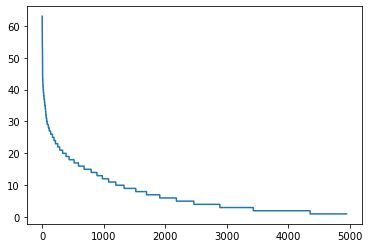

In [80]:
plt.plot(df['filename'].value_counts().values)

In [78]:
plt.show()

In [81]:
res = load('evaluator_dump_R50_075/coco_instances_results.json')

In [83]:
rdf = pd.DataFrame(res)
rdf

,image_id,category_id,bbox,score
0,139,72,"[4.789795398712158, 165.6790771484375, 150.306...",0.863024
1,139,62,"[294.8429870605469, 218.08056640625, 56.301605...",0.811822
2,139,62,"[363.4383850097656, 219.9794921875, 67.6530761...",0.743908
3,139,86,"[166.81060791015625, 232.972412109375, 18.6255...",0.699434
4,139,1,"[420.2927551269531, 157.10125732421875, 42.886...",0.694363
...,...,...,...,...
402951,581781,52,"[469.3309326171875, 191.95555114746094, 81.766...",0.140049
402952,581781,52,"[184.40492248535156, 295.5135498046875, 241.29...",0.138535
402953,581781,52,"[95.07391357421875, 192.88121032714844, 76.654...",0.138366
402954,581781,57,"[0.0, 320.87982177734375, 225.0288543701172, 1...",0.136587


In [84]:
rdf['image_id'].value_counts()

477288    100
35963     100
376284    100
177213    100
345027    100
         ... 
404568      2
229747      1
379453      1
155571      1
514540      1
Name: image_id, Length: 5000, dtype: int64

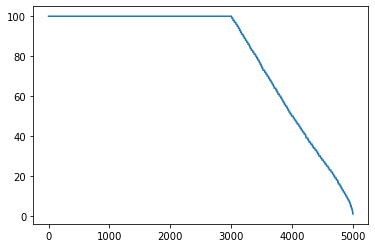

In [85]:
plt.plot(rdf['image_id'].value_counts().values)

In [89]:
rdf[rdf.score > 0.5]

,image_id,category_id,bbox,score
0,139,72,"[4.789795398712158, 165.6790771484375, 150.306...",0.863024
1,139,62,"[294.8429870605469, 218.08056640625, 56.301605...",0.811822
2,139,62,"[363.4383850097656, 219.9794921875, 67.6530761...",0.743908
3,139,86,"[166.81060791015625, 232.972412109375, 18.6255...",0.699434
4,139,1,"[420.2927551269531, 157.10125732421875, 42.886...",0.694363
...,...,...,...,...
402860,581781,52,"[46.34431457519531, 85.9689712524414, 133.9387...",0.603461
402861,581781,52,"[547.4644775390625, 1.8324923515319824, 91.600...",0.599027
402862,581781,52,"[133.11570739746094, 225.24658203125, 300.4082...",0.567392
402863,581781,52,"[515.0420532226562, 0.5221390128135681, 41.982...",0.524803


In [90]:
rdf[rdf.score > 0.5]['image_id'].value_counts()

18380     34
238866    34
414795    32
210273    32
470924    32
          ..
109916     1
493442     1
402765     1
167240     1
139260     1
Name: image_id, Length: 4844, dtype: int64

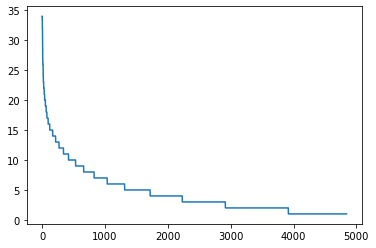

In [91]:
plt.plot(_.values)

In [94]:
df[df.filename == 'datasets/coco/val2017/000000000139.jpg'].sort_values('category_id')

,iscrowd,bbox,category_id,filename,category
8,0,"[384.43, 172.21, 15.12, 35.74]",0,datasets/coco/val2017/000000000139.jpg,person
7,0,"[412.8, 157.61, 53.05, 138.01]",0,datasets/coco/val2017/000000000139.jpg,person
16,0,"[412.25, 219.02, 9.63, 12.52]",56,datasets/coco/val2017/000000000139.jpg,chair
3,0,"[358.98, 218.05, 56.0, 102.83]",56,datasets/coco/val2017/000000000139.jpg,chair
4,0,"[290.69, 218.0, 61.83, 98.48]",56,datasets/coco/val2017/000000000139.jpg,chair
5,0,"[413.2, 223.01, 30.17, 81.36]",56,datasets/coco/val2017/000000000139.jpg,chair
6,0,"[317.4, 219.24, 21.58, 11.59]",56,datasets/coco/val2017/000000000139.jpg,chair
0,0,"[236.98, 142.51, 24.7, 69.5]",58,datasets/coco/val2017/000000000139.jpg,potted plant
19,0,"[321.21, 231.22, 125.56, 88.93]",60,datasets/coco/val2017/000000000139.jpg,dining table
1,0,"[7.03, 167.76, 149.32, 94.87]",62,datasets/coco/val2017/000000000139.jpg,tv
